## Simulate 
- $X\sim U(0,1)$
- $y = 2 + 9X + \epsilon$
- $\epsilon \sim N(0,1)$

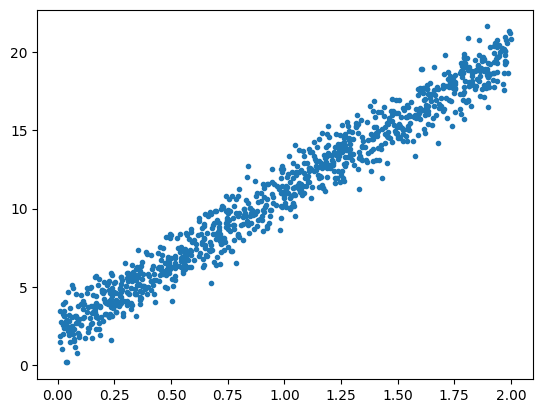

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
samples = 1000 

# X-U(0,1)
X = 2*np.random.rand(samples,1)

# epslion - N(0,1)
eps = np.random.normal(0,1, size=(samples,1))

# y= 2 + 9X + epslsion
y = 2+9*X+eps

plt.plot(X,y, '.')


In [30]:
X = np.c_[np.ones(samples), X]
X[:5], X.shape

(array([[1.        , 0.74908024],
        [1.        , 1.90142861],
        [1.        , 1.46398788],
        [1.        , 1.19731697],
        [1.        , 0.31203728]]),
 (1000, 2))

Train|test split

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 2), (330, 2), (670, 1), (330, 1))

## Batch gradient descent

In [32]:
np.random.seed(42)
def gradient_descent(X, y, learning_rate =.1, epochs = 100):
    m = len(X)
    theta = np.random.randn(X.shape[1],1)

    for _ in range(epochs):
        gradient = 2/m*X.T @ (X @ theta-y)
        theta -= learning_rate*gradient # learning_rate is eta in theory
    return theta

theta = gradient_descent(X_train, y_train, epochs=1000)
theta

array([[2.20500716],
       [8.90206121]])

In [33]:
steps = range(1,200,1)
thetas = [gradient_descent(X_train,y_train, epochs=epoch).reshape(-1) for epoch in steps]



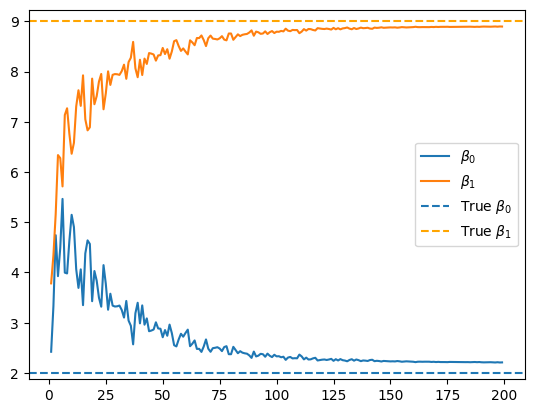

In [35]:
# plotting

fig, ax = plt.figure(), plt.axes()
ax.plot(steps, thetas, label = [r"$\beta_0$", r"$\beta_1$"])
ax.axhline(y = 2, linestyle="--", label = r"True $\beta_0$")
ax.axhline(y = 9, color = "orange", linestyle="--", label = r"True $\beta_1$")
ax.legend(); # Seems to converge. 200 epochs. from steps range variable.

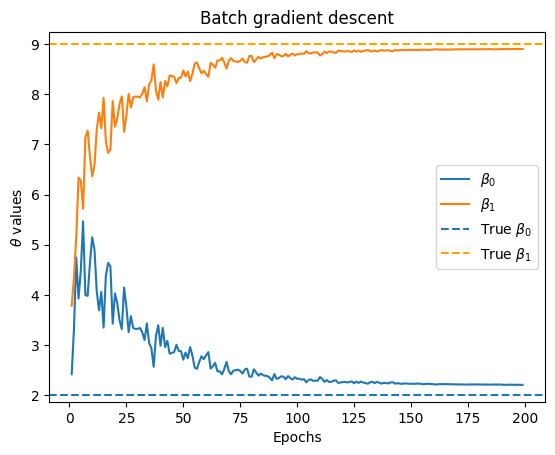

In [36]:
fig, ax = plt.figure(), plt.axes()
ax.plot(steps, thetas, label = [r"$\beta_0$", r"$\beta_1$"])
ax.axhline(y = 2, linestyle="--", label = r"True $\beta_0$")
ax.axhline(y = 9, color = "orange", linestyle="--", label = r"True $\beta_1$")
ax.set(xlabel = "Epochs", ylabel = r"$\theta$ values", title ="Batch gradient descent")
ax.legend()

Stochastic gradient descent (SGD)

* Geron (2019)

In [38]:
epochs = 10 

t0, t1 = 5, 50 # learning schedule hyperparameters 

def learning_rate_schedule(t):
    """decayas the learning rate as traning progreses"""
    return t0/(t+t1)


theta = np.random.randn(2,1)

m = len(X_train)

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        x_i = X_train[random_index:random_index+1]
        y_i = X_train[random_index:random_index+1]

        gradient = 2*x_i.T.dot(x_i.dot(theta) - y_i)
        eta = learning_rate_schedule(epoch*m+i)  #kokchun kommer inte ihåg varför man gör detta 
        theta -= eta*gradient

theta

ValueError: non-broadcastable output operand with shape (2,1) doesn't match the broadcast shape (2,2)

In [40]:
y_pred = X_test@theta
y_pred.shape

mae= np.mean(np.absolute(y_test-y_pred))

(330, 1)